In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
scores_df = pd.read_csv("data-files/scores_em.csv", index_col="student number")

In [8]:
scores_df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [16]:
scores_df.describe()
print( scores_df["english"].mode(), scores_df["mathematics"].mode() )
scores_df['mathematics'].value_counts()[:5]

0    57
Name: english, dtype: int64 0    77
1    82
2    84
Name: mathematics, dtype: int64


mathematics
84    4
82    4
77    4
76    3
81    3
Name: count, dtype: int64

In [28]:
eng_scores = scores_df["english"].values
eng_mean = scores_df["english"].mean()
# print( eng_scores, eng_mean )
# print( eng_scores - eng_mean )

deviation = eng_scores - eng_mean
# print( deviation ** 2 )
var = np.mean(deviation ** 2)
print(var)

print( scores_df['english'].var(ddof=1) )

94.1156
96.03632653061224


In [33]:
scores_df.describe()
np.percentile(scores_df["english"], (10, 90)) # 10분위, 90분위 값 찾기

array([44.7, 70. ])

In [37]:
from scipy.stats import pearsonr, spearmanr, kendalltau

print( scores_df.corr() )
print( pearsonr( scores_df["english"], scores_df['mathematics']) )
print( spearmanr( scores_df["english"], scores_df['mathematics']) )
print( kendalltau( scores_df["english"], scores_df['mathematics']) )


              english  mathematics
english      1.000000     0.723741
mathematics  0.723741     1.000000
PearsonRResult(statistic=0.7237414863069243, pvalue=2.8760870522821537e-09)
SignificanceResult(statistic=0.7045853895409744, pvalue=1.1269964723609888e-08)
SignificanceResult(statistic=0.53131572579566, pvalue=1.134129795679461e-07)


In [44]:
anscombe = np.load('data-files/anscombe.npy')
print( anscombe.shape )
print( anscombe[0] )

(4, 11, 2)
[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [50]:
pearsonr(anscombe[0][0], anscombe[0][1])[0]

1.0

In [52]:
stats_df = pd.DataFrame(index=['x_mean', 'x_variance', 'y_mean', 'y_variance', "corr", "reg_line"])
stats_df
for idx, data in enumerate(anscombe):
    X = data[:, 0] # 0열 데이터
    y = data[:, 1] # 1열 데이터
    stats_df[f'data{idx+1}'] = [np.mean(X), np.var(X), np.mean(y), np.var(y), pearsonr(X, y)[0], 0]

stats_df

,data1,data2,data3,data4
x_mean,9.000000,9.000000,9.000000,9.000000
x_variance,10.000000,10.000000,10.000000,10.000000
y_mean,7.500909,7.500909,7.500000,7.500909
y_variance,3.752063,3.752390,3.747836,3.748408
corr,0.816421,0.816237,0.816287,0.816521
reg_line,0.000000,0.000000,0.000000,0.000000


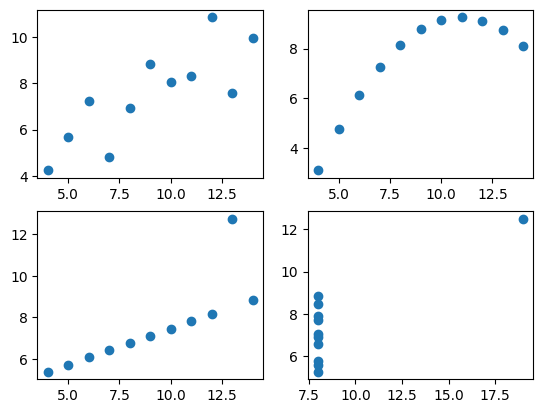

In [62]:
figure, axes = plt.subplots(2, 2)
for idx, ax in enumerate(axes.flatten()): # flatten : n차원 배열 -> 1차원 배열 변환
    ax.scatter(anscombe[idx][:, 0], anscombe[idx][:, 1])

plt.show()